In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import tidynamics

from mdhelper.algorithm import correlation
from mdhelper.plot.rcparam import update

update("acs", font_scaling=1.25, size_scaling=1.5)

rng = np.random.default_rng()

/home/bye/miniconda3/envs/research/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Correlation functions

In [2]:
n_tests = 20
n_atoms = 5_000
n_atoms_test = np.sort(
    np.unique(
        np.concatenate(
            (2 ** np.arange(1, 13),
             np.logspace(0, np.log10(n_atoms + 1), 50, dtype=int))
        )
    )
)
n_frames = 50_000
n_frames_test = np.sort(
    np.unique(
        np.concatenate(
            (2 ** np.arange(1, 14),
             np.logspace(np.log10(2), np.log10(n_frames + 1), 50, dtype=int))
        )
    )
)

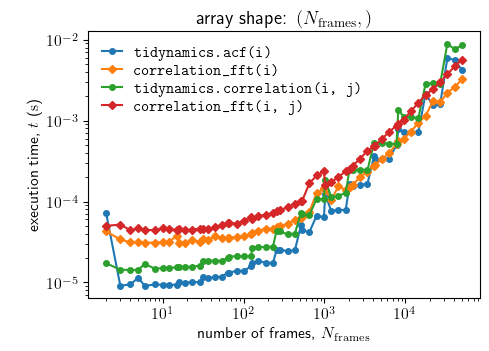

In [3]:
times = np.empty((2, 2, n_frames_test.shape[0])) # (module, algorithm, # frames)
for i, f in enumerate(n_frames_test):
    data_i = rng.random(f)
    data_j = rng.random(f)
    start = datetime.now()
    for _ in range(n_tests):
        acf_t = tidynamics.acf(data_i)
    times[0, 0, i] = (datetime.now() - start).total_seconds()
    start = datetime.now()
    for _ in range(n_tests):
        acf_m = correlation.correlation_fft(data_i, axis=0)
    times[1, 0, i] = (datetime.now() - start).total_seconds()
    assert np.allclose(acf_m, acf_t)
    start = datetime.now()
    for _ in range(n_tests):
        ccf_t = tidynamics.correlation(data_i, data_j)
    times[0, 1, i] = (datetime.now() - start).total_seconds()
    start = datetime.now()
    for _ in range(n_tests):
        ccf_m = correlation.correlation_fft(data_i, data_j, axis=0)
    times[1, 1, i] = (datetime.now() - start).total_seconds()
    assert np.allclose(ccf_m, ccf_t)
times /= n_tests

_, ax = plt.subplots()
ax.plot(n_frames_test, times[0, 0], "o-", ms=4, label=r"\texttt{tidynamics.acf(i)")
ax.plot(n_frames_test, times[1, 0], "D-", ms=4, label=r"\texttt{correlation_fft(i)}")
ax.plot(n_frames_test, times[0, 1], "o-", ms=4, label=r"\texttt{tidynamics.correlation(i, j)}")
ax.plot(n_frames_test, times[1, 1], "D-", ms=4, label=r"\texttt{correlation_fft(i, j)}")
ax.legend(edgecolor="none", facecolor="none")
ax.set_xlabel("number of frames, $N_\mathrm{frames}$")
ax.set_xscale("log")
ax.set_ylabel("execution time, $t$ ($\mathrm{s}$)")
ax.set_yscale("log")
ax.set_title("array shape: $(N_\mathrm{frames},)$")
ax.text(-0.2, 1.04, " ", transform=ax.transAxes)
plt.show()

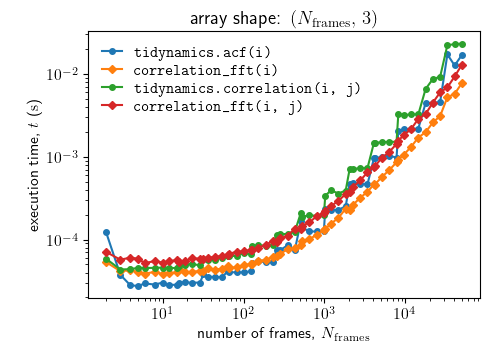

In [4]:
times = np.empty((2, 2, n_frames_test.shape[0])) # (module, algorithm, # frames)
for i, f in enumerate(n_frames_test):
    data_i = rng.random((f, 3))
    data_j = rng.random((f, 3))
    start = datetime.now()
    for _ in range(n_tests):
        acf_t = tidynamics.acf(data_i)
    times[0, 0, i] = (datetime.now() - start).total_seconds()
    start = datetime.now()
    for _ in range(n_tests):
        acf_m = correlation.correlation_fft(data_i, axis=0, vector=True)
    times[1, 0, i] = (datetime.now() - start).total_seconds()
    assert np.allclose(acf_m, acf_t)
    start = datetime.now()
    for _ in range(n_tests):
        ccf_t = tidynamics.correlation(data_i, data_j)
    times[0, 1, i] = (datetime.now() - start).total_seconds()
    start = datetime.now()
    for _ in range(n_tests):
        ccf_m = correlation.correlation_fft(data_i, data_j, axis=0, vector=True)
    times[1, 1, i] = (datetime.now() - start).total_seconds()
    assert np.allclose(ccf_m, ccf_t)
times /= n_tests

_, ax = plt.subplots()
ax.plot(n_frames_test, times[0, 0], "o-", ms=4, label=r"\texttt{tidynamics.acf(i)")
ax.plot(n_frames_test, times[1, 0], "D-", ms=4, label=r"\texttt{correlation_fft(i)}")
ax.plot(n_frames_test, times[0, 1], "o-", ms=4, label=r"\texttt{tidynamics.correlation(i, j)}")
ax.plot(n_frames_test, times[1, 1], "D-", ms=4, label=r"\texttt{correlation_fft(i, j)}")
ax.legend(edgecolor="none", facecolor="none")
ax.set_xlabel("number of frames, $N_\mathrm{frames}$")
ax.set_xscale("log")
ax.set_ylabel("execution time, $t$ ($\mathrm{s}$)")
ax.set_yscale("log")
ax.set_title("array shape: $(N_\mathrm{frames},\,3)$")
ax.text(-0.2, 1.04, " ", transform=ax.transAxes)
plt.show()

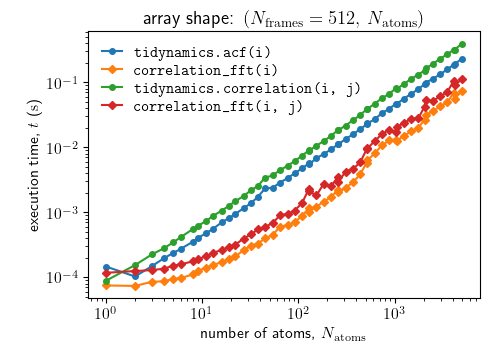

In [5]:
times = np.empty((2, 2, n_atoms_test.shape[0])) # (module, algorithm, # frames)
for i, a in enumerate(n_atoms_test):
    data_i = rng.random((512, a))
    data_j = rng.random((512, a))
    start = datetime.now()
    for _ in range(n_tests):
        acf_t = np.stack(tuple(tidynamics.acf(data_i[:, j]) for j in range(a)), axis=1)
    times[0, 0, i] = (datetime.now() - start).total_seconds()
    start = datetime.now()
    for _ in range(n_tests):
        acf_m = correlation.correlation_fft(data_i, axis=0)
    times[1, 0, i] = (datetime.now() - start).total_seconds()
    assert np.allclose(acf_m, acf_t)
    start = datetime.now()
    for _ in range(n_tests):
        ccf_t = np.stack(tuple(tidynamics.correlation(data_i[:, j], data_j[:, j]) for j in range(a)), axis=1)
    times[0, 1, i] = (datetime.now() - start).total_seconds()
    start = datetime.now()
    for _ in range(n_tests):
        ccf_m = correlation.correlation_fft(data_i, data_j, axis=0)
    times[1, 1, i] = (datetime.now() - start).total_seconds()
    assert np.allclose(ccf_m, ccf_t)
times /= n_tests

_, ax = plt.subplots()
ax.plot(n_atoms_test, times[0, 0], "o-", ms=4, label=r"\texttt{tidynamics.acf(i)")
ax.plot(n_atoms_test, times[1, 0], "D-", ms=4, label=r"\texttt{correlation_fft(i)}")
ax.plot(n_atoms_test, times[0, 1], "o-", ms=4, label=r"\texttt{tidynamics.correlation(i, j)}")
ax.plot(n_atoms_test, times[1, 1], "D-", ms=4, label=r"\texttt{correlation_fft(i, j)}")
ax.legend(edgecolor="none", facecolor="none")
ax.set_xlabel("number of atoms, $N_\mathrm{atoms}$")
ax.set_xscale("log")
ax.set_ylabel("execution time, $t$ ($\mathrm{s}$)")
ax.set_yscale("log")
ax.set_title(f"array shape: $(N_\mathrm{{frames}}=512,\,N_\mathrm{{atoms}})$")
ax.text(-0.2, 1.04, " ", transform=ax.transAxes)
plt.show()